In [7]:
import pandas as pd
import json
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
userdatapath = '/home/titli/Documents/Springboard1/test.csv'
selecteddatapath = '/home/titli/Documents/Springboard1/test1.csv'
reviewfile= '/home/titli/Documents/Springboard1/dataset/review.json'
numsamples=200
rowsamples=20

In [142]:
old=pd.read_csv(userdatapath, header=0,  index_col=0, nrows=numsamples)
#selectedrows=[0,8,12,15,19,25,28,29,1,3,4,5,6,7,9,10,44,46,16,17]
selectedrows=[0,8,12,15,19,25,28,29,2,3,4,5,6,7,9,10,44,46,16,17]
inter=[]
for row in selectedrows:
    line= old.iloc[row]
    inter.append(line)
old_1=pd.DataFrame(inter)
old_1.set_index('user_id')
old_1.head(10)
old_1.to_csv(selecteddatapath)

In [143]:
from pandas.io.json import json_normalize
def getreviews(user_ids):
    """ gets one text review for each user in user_ids list"""
    result=[]
    with open(reviewfile) as f:
         for line in f:
             record = json.loads(line)
             if record['user_id'] in user_ids: 
                result.append(record)
             if len(result) >= numsamples:
                break
    reviewdata = pd.DataFrame(result)
    return reviewdata

In [144]:
small= pd.read_csv(selecteddatapath, header=0)
cols='average_stars 	compliment_cool 	compliment_funny 	review_count  fans'.split()
user_ids = small['user_id'].iloc[:numsamples].values.tolist()
review_texts = getreviews(user_ids)
old_2=small[cols]
old_2.head()

,average_stars,compliment_cool,compliment_funny,review_count,fans
0,4.67,0,0,8,0
1,1.00,0,0,1,0
2,1.67,0,0,2,0
3,3.00,0,0,2,0
4,3.73,1,1,48,3


In [145]:
df1 = []
for k in range(0,rowsamples):
    df1.append({'rev_length': len(review_texts['text'].iloc[k])})
revlen=pd.DataFrame(df1)

In [146]:
from collections import Counter
import re
df4=[]
counts_UC=[]
counts_LC=[]
counts_NO=[]
counts_uscore=[]
counts_dash=[]

for k in range(0,rowsamples):
    counts_UC=(len(re.findall(r'[A-Z]', old_1['user_id'].iloc[k])))
    counts_NO=(len(re.findall(r'[0-9]', old_1['user_id'].iloc[k])))
    counts_LC=(len(re.findall(r'[a-z]', old_1['user_id'].iloc[k])))
    counter = Counter(old_1['user_id'].iloc[k])
    counts_uscore=(counter['_'])
    counts_dash=(counter['-'])
    df4.append({'Uppercase': counts_UC, 'Lowercase': counts_LC, 'Number': counts_NO})
               
                #'Dash': counts_dash, 'underscore': counts_uscore})
    #str user_id keys is a charecter values no. of times charecyter occurs.
#create a dataframe append that dataframe
userid_counts=pd.DataFrame(df4)

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
df4 = []
for k in range(0,rowsamples):
    corpus = [old_1['user_id'].iloc[k]]
    vectorizer = TfidfVectorizer()
    A = vectorizer.fit_transform(corpus)
    Al = A.tolil()
    df4.append({'tfvec': Al.data[0][0]})
userid_counts=pd.DataFrame(df4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92d8531f60>,
      dtype=object)

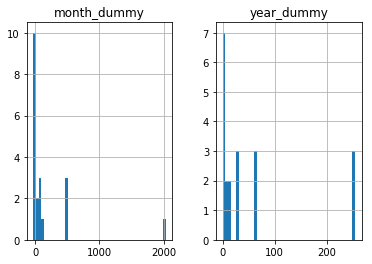

In [147]:
def getnumericyear(A):
    years= ['2004','2005','2006', '2007', '2008' ,'2009', '2010', '2011', '2012', '2013', '2014', '2015', 
        '2016', '2017', '2018']
    for i, x in enumerate(years):
        if (A in x)==True:
            return i+1
def getnumericmonth(B):
    months=['01','02', '03', '04', '05', '06', '07','08', '09', '10', '11','12']
    for i, x in enumerate(months):
        if (B in x)==True:
            return i+1
def getrange(B):
    if B <= -300: return -3
    if B <= -200 and B > -300: return -2
    if B <= -100 and B > -200: return -1
    if B <= 0 and B > -100: return 0
    if B <= 100 and B > 0: return 1
    if B <= 200 and B > 100: return 2
    if B <= 300 and B > 200: return 3
    
Xyear=old_1['yelping_since']   
df1 = []
for k in range(0,rowsamples):
    dyear=(Xyear.iloc[k]).split("-")
    rr1= np.int_(np.concatenate([np.zeros(getnumericmonth(dyear[1])-1),[1],np.zeros(12-getnumericmonth(dyear[1]))]).tolist()) 
    month_d= (int('1'+''.join(map(str, rr1)),2))+ int(dyear[2])-4127 # subtract mode
    rr2= np.int_(np.concatenate([np.zeros(getnumericyear(dyear[0])-1),[1],np.zeros(15-getnumericyear(dyear[0]))]).tolist()) 
    year_d=(int('1'+''.join(map(str, rr2)),2))-32770
    df1.append({'year_dummy': year_d, 'month_dummy': month_d })
            
    
yelp_since=pd.DataFrame(df1)
#sns.heatmap(df_yelp, annot=True)
yelp_since.hist(bins=50)

In [148]:
old_1['friends'].replace(to_replace= '[]', value=np.nan, inplace=True)
old_1['friends'].fillna(value='00', inplace=True) 

In [149]:
df2 = []
for k in range(0,rowsamples):
    count=0
    Xfrnd=(old_1['friends'].iloc[[k]].values).tolist()
    dfrnd = (", ".join(Xfrnd)).split(',')[1:-1]
    if dfrnd is None:
       break
    else:
       count=len(dfrnd)
       df2.append({'friend_count': count})    
frnd=pd.DataFrame(df2)
frnd.head()

,friend_count
0,9
1,0
2,0
3,0
4,261


In [150]:
df3 = []
for k in range(0,rowsamples):
    count=0
    Xelite=(old_1['elite'].iloc[[k]].values).tolist()
    delite = (", ".join(Xelite)).split(',')[1:-1]
    if delite is None:
       break
    else:
       count=len(delite)
       df3.append({'elite_count': count})    
elite=pd.DataFrame(df3)
elite.head()

,elite_count
0,0
1,0
2,0
3,0
4,0


In [151]:
# Faker dataframe
d={'Faker':[1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0]}
#(0,8,12,15,19,25,28,29, 2,3,4,5,6,7,9,10,32,35,11,13)
faker= pd.DataFrame(data=d)

In [152]:
#new = pd.concat([old_2, yelp_since, frnd, elite, userid_counts, revlen, faker], axis=1)
new = pd.concat([old_2, yelp_since, frnd, elite, userid_counts, revlen, faker], axis=1)
new.head()

,average_stars,compliment_cool,compliment_funny,review_count,fans,month_dummy,year_dummy,friend_count,elite_count,Lowercase,Number,Uppercase,rev_length,Faker
0,4.67,0,0,8,0,-26,14,9,0,12,1,7,402,1
1,1.00,0,0,1,0,-17,254,0,0,12,5,5,327,1
2,1.67,0,0,2,0,57,2,0,0,7,3,11,445,1
3,3.00,0,0,2,0,-3,0,0,0,8,3,9,823,1
4,3.73,1,1,48,3,7,254,261,0,8,2,12,240,1


# Machine learning

In [153]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
cleaned_data=new
#feature_columns =' 	average_stars 	compliment_cool 	compliment_funny 	review_count 	 \
#fans  	friend_count 	elite_count  	Lowercase 	Number 	Uppercase'.split()

#feature_columns =' 	average_stars 	compliment_cool 	compliment_funny 	review_count 	 \
#fans 	month_dummy 	year_dummy 	friend_count 	elite_count  	tfvec'.split()

feature_columns =' 	average_stars 	compliment_cool 	compliment_funny 	review_count 	 \
fans 	month_dummy 	year_dummy 	friend_count 	elite_count 	Lowercase 	Number 	Uppercase'.split()


target_columns = ['Faker']
X = cleaned_data[feature_columns]
y= cleaned_data[target_columns]

# Create the regressor: reg
reg = LinearRegression()
# Create the prediction space
#prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X,y)


# Print R^2 
print('R^2: {:0.3}'.format(reg.score(X,y)))

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2 train_test_split: {:0.3}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:0.3}".format(rmse))


R^2: 0.619
R^2 train_test_split: -1.64
Root Mean Squared Error: 0.786


In [154]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train=X.values[:16,:]
y_train =y.values[:16,:]

X_test=X.values[16:,:]
y_test =y.values[16:,:]
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred =logreg.predict(X_test)
y_pred_train =logreg.predict(X_train)


/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:
def confusion(predictions, actuals):
    actuals=actuals.values[:,0] if isinstance(actuals,pd.DataFrame) else actuals
    
    true_pos= (predictions==1) & (actuals==1)
    true_pos.sum()
    true_neg= (predictions==0) & (actuals==0)
    true_neg.sum()
    false_pos= (predictions==1) & (actuals==0)
    false_pos.sum()
    false_neg= (predictions==0) & (actuals==1)
    false_neg.sum()
    
    prec=true_pos.sum()/(true_pos.sum()+false_pos.sum())
    accur=(true_pos.sum()+true_neg.sum())/(true_pos.sum()+false_pos.sum()+ \
                                           true_neg.sum()+ false_neg.sum())
    recall = true_pos.sum()/(true_pos.sum()+false_neg.sum())
    F1=2*(prec*recall/(prec+recall))
 
    return([[true_pos.sum(), false_pos.sum()],[false_neg.sum(),true_neg.sum()]],prec, accur,recall, F1)

In [156]:
y_test

array([[1],
       [1],
       [0],
       [0]])

In [157]:
confusion(y_pred, y_test.reshape((1,4)))

([[1, 1], [1, 1]], 0.5, 0.5, 0.5, 0.5)

In [158]:
confusion(y_pred_train, y_train.reshape((1, 16)))

([[8, 0], [0, 8]], 1.0, 1.0, 1.0, 1.0)

True Positive (8)| False Postive|
---|---|
False Negatives | True Negatives(8)| 


### Precision-recall Curve
When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:
<br>
Precision=$\frac{TP}{TP+FP}$
<br>
Recall=$\frac{TP}{TP+FN}$
<br>
F1 score = 2*$\frac{Precision*Recall}{Precision+Recall}$

Linereg with user_id| R^2 | R^2 train_test_split | RMS |5-Fold CV| Avg 5-fold|
---|---|---|---|---|
 | 0.415 | -6.57 | 1.33|-1.89, 0.,-1.35 |-1.718 |
 | | | | -0.88, -4.47| | |
<br>


Logreg with user_id| precision | recall | f1-score |AUC 5-Fold CV| Avg AUC|GridSearch (3 fold)|GridSearch score
---|---|---|---|---|---|---|
0.0| 0.50 | 0.67 | 0.57|0,0,1,0.33,0 |0.33 | 0.0063|0.65|
1.0| 0.50 | 0.33 | 0.40 || | | | |
